In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import pandas as pd

# (1) Import data from Rose19

paper: https://iopscience.iop.org/article/10.3847/1538-4357/ab0704/pdf <br>
basic tools and dataset: https://github.com/benjaminrose/MC-Age/tree/master/data (data might be outdated)<br>
full MCMC chain and some other detailed data: https://zenodo.org/record/3875482

## data prep

In [2]:
data = pd.read_csv('data/HRvsAge_Median+STD+Bounds.csv')
data.head(3)

,SNID,Age_global,Age_global_err,HR,HR_err,Age_median,Age_lower,Age_upper
0,762,8.0,3.9,0.15,0.08,7.970196,1.769602,9.530263
1,1032,8.6,4.3,-0.15,0.12,8.617191,1.753334,10.272933
2,1371,8.1,1.3,-0.14,0.06,8.071166,6.613812,9.277128


In [11]:
# prepare an array for uneven errorbars
xerr = np.array([data['Age_median'].values - data['Age_lower'].values ,data['Age_upper'].values - data['Age_median'].values])

## plot

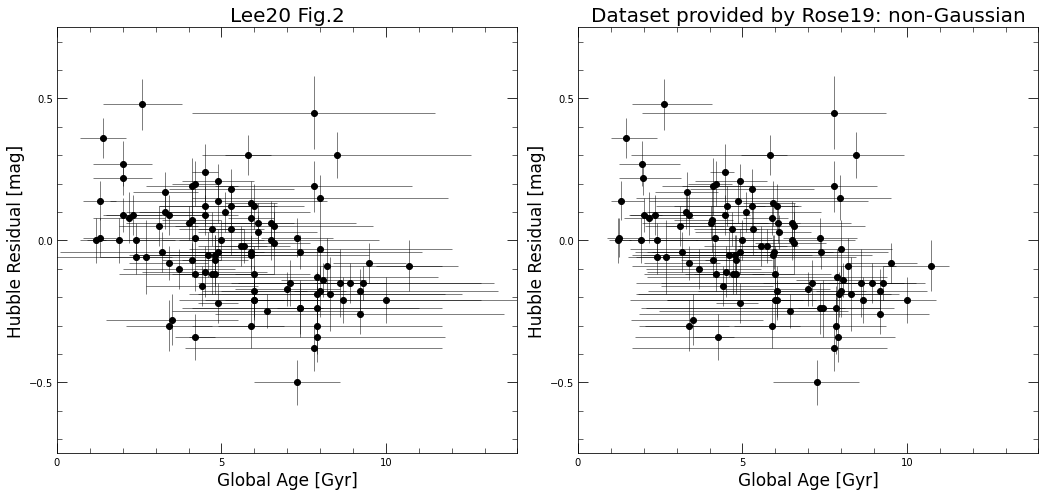

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

ax1.errorbar(data['Age_global'],data['HR'],yerr=data['HR_err'],xerr=data['Age_global_err'],fmt='ko',lw=0.5)
ax2.errorbar(data['Age_median'],data['HR'],yerr=data['HR_err'],xerr=xerr,fmt='ko',lw=0.5)

ax1.set_title('Lee20 Fig.2',fontsize=20)
ax2.set_title('Dataset provided by Rose19: non-Gaussian',fontsize=20)
for ax in [ax1,ax2]:
    ax.set_xlabel('Global Age [Gyr]',fontsize=17)
    ax.set_ylabel('Hubble Residual [mag]',fontsize=17)
    ax.set_xlim(0,14)
    ax.set_ylim(-0.75,0.75)
    ax.tick_params(which='major', length=10, direction='in',right=True,top=True)
    ax.tick_params(which='minor', length=5, direction='in',right=True,top=True)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))

plt.tight_layout()

## sanity check:

In this data, 'HR','HR_err','Age_global','Age_global_err' are taken from their paper's Table 1+7, while Age_median and bounds are taken from their dataset. So let's check if these two sets of data are consistent with each other.


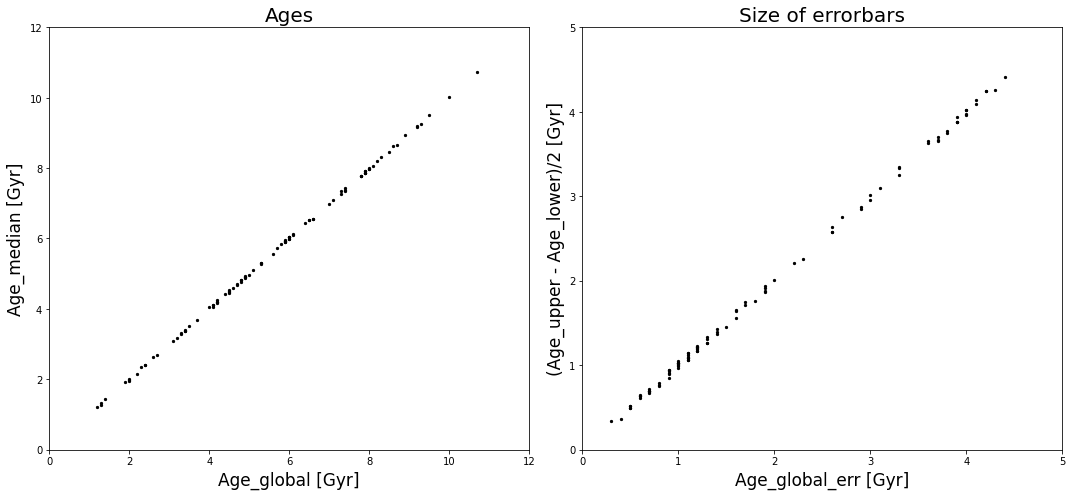

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

ax1.scatter(data['Age_global'],data['Age_median'],c='k',s=5)
ax2.scatter(data['Age_global_err'],(data['Age_upper']-data['Age_lower'])/2,c='k',s=5)

ax1.set_title('Ages',fontsize=20)
ax2.set_title('Size of errorbars',fontsize=20)
ax1.set_xlabel('Age_global [Gyr]',fontsize=17)
ax1.set_ylabel('Age_median [Gyr]',fontsize=17)
ax1.set_xlim(0,12)
ax1.set_ylim(0,12)
ax2.set_xlabel('Age_global_err [Gyr]',fontsize=17)
ax2.set_ylabel('(Age_upper - Age_lower)/2 [Gyr]',fontsize=17)
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

plt.tight_layout()

### $\rightarrow$ based on the shape of these scatter plots, we can say they are identical except that values from Table1+7 are rounded. All good.

# (2) Analysis

## TODO

* quantify differences in the results due to different treatment of data (1, Yukei)
* quantify differences in the results due to different linear fitting and correlation analysis (2, Keto)

## a few notes 
* (1) requires (2) after obtaining the original distribution data. 
* To discuss the 'dilution' issue Lee20 talks about, we can make a plot of the best-fit slope as a function of number of samples.
* In Lee20, they claim non-Gaussianity doesn't matter. It definitely does especially the posterior is asymmetric, so we should show that with mock data.
> "Since the public dataset of Rose t al. (2019) does not provide non-Gaussian error bars, we assume Gaussian errors here for mock data generation. However, as our experiment shows, the different due to this non-Gaussianity is insignificant." (Lee20)